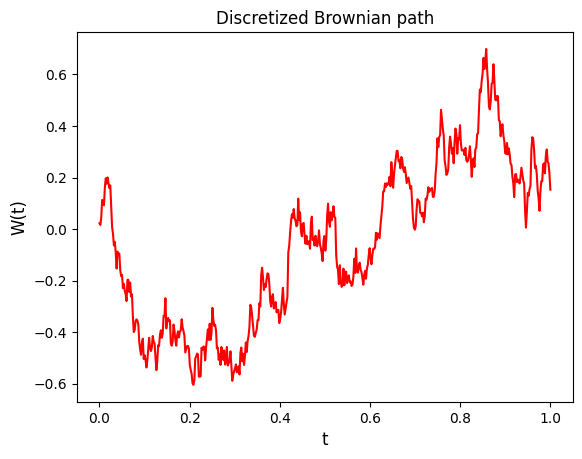

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # set the seed for reproducibility
T = 1
N = 500
dt = T / N
dW = np.zeros(N)  
W = np.zeros(N)

dW[0] = np.sqrt(dt) * np.random.randn()  # first approximation outside the loop
W[0] = dW[0]  # since W(0) = 0 is not allowed
for j in range(1, N):
    dW[j] = np.sqrt(dt) * np.random.randn()  
    W[j] = W[j - 1] + dW[j]

plt.plot(np.linspace(0, T, N), W, 'r-') 
plt.xlabel('t', fontsize=12, rotation= 0)
plt.ylabel('W(t)', fontsize=12, rotation=90)
plt.title("Discretized Brownian path")
plt.show()

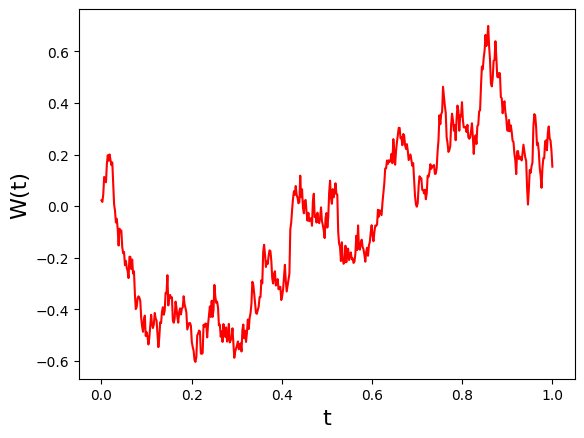

In [12]:
np.random.seed(42)  # set the seed for reproducibility
T = 1
N = 500
dt = T / N

dW = np.sqrt(dt) * np.random.randn(N)  # increments
W = np.cumsum(dW)  # cumulative sum

plt.plot(np.linspace(0, T, N), W, 'r-')  # plot W against t
plt.xlabel('t', fontsize=16)
plt.ylabel('W(t)', fontsize=16, rotation=90)
plt.show()

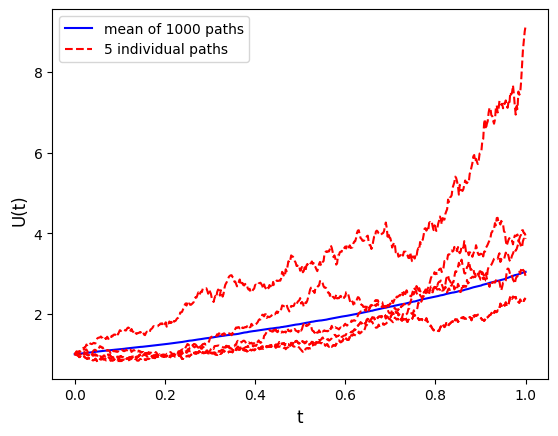

Sample error: 0.06022924954656039


In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # set the seed for reproducibility
T = 1
N = 500
dt = T / N
t = np.linspace(dt, T, N)

M = 1000  # M paths simultaneously
dW = np.sqrt(dt) * np.random.randn(M, N)  # increments
W = np.cumsum(dW, axis=1)  # cumulative sum
U = np.exp(np.tile(t, (M, 1)) + 0.5 * W)
Umean = np.mean(U, axis=0)

plt.plot(np.concatenate(([0], t)), np.concatenate(([1], Umean)), 'b-', label='mean of 1000 paths')  # plot mean over M paths
for i in range(5):
    plt.plot(np.concatenate(([0], t)), np.concatenate(([1], U[i, :])), 'r--')  # plot 5 individual paths
plt.plot(np.concatenate(([0], t)), np.concatenate(([1], U[i, :])), 'r--', label='5 individual paths') 
plt.xlabel('t', fontsize=12)
plt.ylabel('U(t)', fontsize=12, rotation=90, horizontalalignment='right')
plt.legend()
plt.show()

# Calculate the sample error
exact_mean = np.exp(9 * t / 8)
averr = np.linalg.norm(Umean - exact_mean, ord=np.inf)
print(f'Sample error: {averr}')

In [22]:
import numpy as np


np.random.seed(42)

T = 1
N = 50
dt = T / N

# Generate increments
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

# Compute Ito integral
ito = np.sum(np.concatenate(([0], W[:-1])) * dW)

# Compute Stratonovich integral
strat = np.sum((0.5 * (np.concatenate(([0], W[:-1])) + W) + 0.5 * np.sqrt(dt) * np.random.randn(N)) * dW)

# Compute errors
itoerr = abs(ito - 0.5 * (W[-1] ** 2 - T))
straterr = abs(strat - 0.5 * W[-1] ** 2)

# Print results
print(f'Ito integral: {ito}')
print(f'Stratonovich integral: {strat}')
print(f'Ito error: {itoerr}')
print(f'Stratonovich error: {straterr}')


Ito integral: 0.8183914846217277
Stratonovich integral: 1.3129863859818722
Ito error: 0.047429435835356415
Stratonovich error: 0.042024337195500916


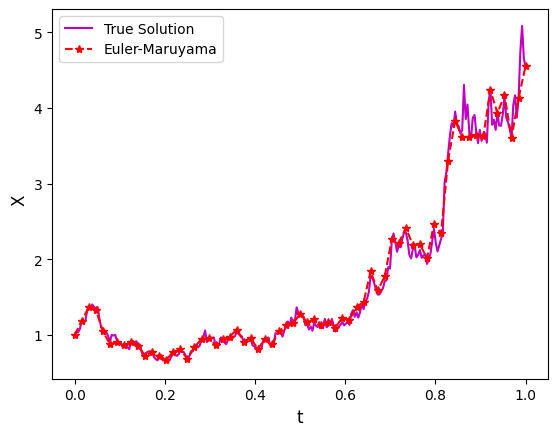

Error: 0.017241810053930884


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Problem parameters
lambda_ = 2
mu = 1
Xzero = 1

# Discretization parameters
T = 1
N = 2**8
dt = 1 / N

# Generate Brownian increments and path
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

# True solution
t = np.linspace(dt, T, N)
Xtrue = Xzero * np.exp((lambda_ - 0.5 * mu**2) * t + mu * W)

# Plot true solution
plt.plot(np.concatenate(([0], t)), np.concatenate(([Xzero], Xtrue)), 'm-', label='True Solution')

# Euler-Maruyama method parameters
R = 4
Dt = R * dt
L = N // R

# Preallocate for efficiency
Xem = np.zeros(L)
Xtemp = Xzero

# Euler-Maruyama method
for j in range(L):
    Winc = np.sum(dW[R * j:R * (j + 1)])
    Xtemp += Dt * lambda_ * Xtemp + mu * Xtemp * Winc
    Xem[j] = Xtemp

# Plot Euler-Maruyama approximation
t_em = np.linspace(Dt, T, L)
plt.plot(np.concatenate(([0], t_em)), np.concatenate(([Xzero], Xem)), 'r--*', label='Euler-Maruyama')

# Plot formatting
plt.xlabel('t', fontsize=12)
plt.ylabel('X', fontsize=12, rotation=90, horizontalalignment='right')
plt.legend()
plt.show()

# Compute error
emerr = abs(Xem[-1] - Xtrue[-1])
print(f'Error: {emerr}')


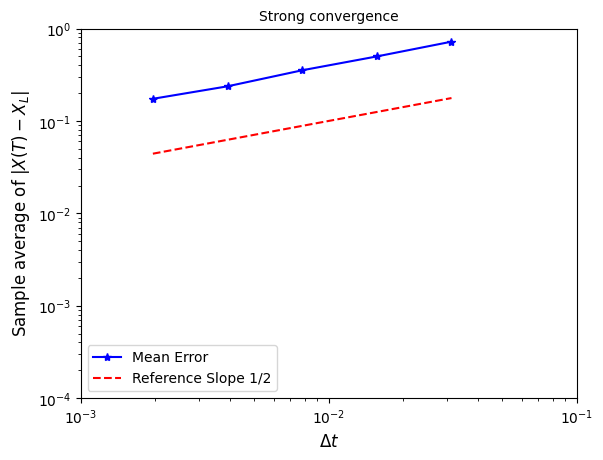

Least squares fit parameter q: 0.5182110094916429
Residual: 0.03703552713324324


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Problem parameters
lambda_ = 2
mu = 1
Xzero = 1

# Discretization parameters
T = 1
N = 2**9
dt = T / N

# Number of paths sampled
M = 1000

# Preallocate array for errors
Xerr = np.zeros((M, 5))

# Main loop for sampling over discrete Brownian paths
for s in range(M):
    # Generate Brownian increments and path
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.cumsum(dW)
    
    # Compute true solution at T
    Xtrue = Xzero * np.exp((lambda_ - 0.5 * mu**2) * T + mu * W[-1])
    
    # Test different timesteps
    for p in range(5):
        R = 2**p
        Dt = R * dt
        L = N // R
        
        # Euler-Maruyama method
        Xtemp = Xzero
        for j in range(L):
            Winc = np.sum(dW[R * j:R * (j + 1)])
            Xtemp += Dt * lambda_ * Xtemp + mu * Xtemp * Winc
        
        # Store the error at t = 1
        Xerr[s, p] = abs(Xtemp - Xtrue)

# Calculate mean errors
mean_Xerr = np.mean(Xerr, axis=0)

# Timesteps
Dtvals = dt * (2**np.arange(5))

# Plotting
# plt.figure(figsize=(12,8))
plt.loglog(Dtvals, mean_Xerr, 'b*-', label='Mean Error')
plt.loglog(Dtvals, Dtvals**0.5, 'r--', label='Reference Slope 1/2')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel(r'$\Delta t$', fontsize=12)
plt.ylabel(r'Sample average of $| X(T) - X_L |$', fontsize=12)
plt.title('Strong convergence', fontsize=10)
plt.legend()
plt.show()

# Least squares fit of error = C * Dt^q
A = np.vstack([np.ones(5), np.log(Dtvals)]).T
rhs = np.log(mean_Xerr)
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(A@sol - rhs)

print(f'Least squares fit parameter q: {q}')
print(f'Residual: {resid}')


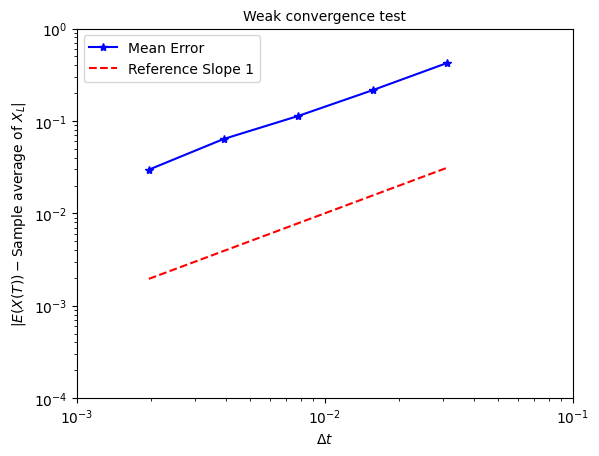

Least squares fit parameter q: 0.9439840643391564
Residual: 0.08275087351966516


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Problem parameters
lambda_ = 2
mu = 0.1
Xzero = 1
T = 1

# Number of paths sampled
M = 50000

# Preallocate array for Euler-Maruyama means
Xem = np.zeros(5)

# Loop over different Euler timesteps
for p in range(1, 6):
    Dt = 2**(p - 10)
    L = int(T / Dt)
    
    # Initialize Xtemp for all paths
    Xtemp = Xzero * np.ones(M)
    
    # Euler-Maruyama method
    for j in range(L):
        Winc = np.sqrt(Dt) * np.random.randn(M)
        Winc = np.sqrt(Dt) * np.sign(np.random.randn(M))
        Xtemp += Dt * lambda_ * Xtemp + mu * Xtemp * Winc
    
    # Store the mean of Xtemp
    Xem[p-1] = np.mean(Xtemp)

# Compute errors
Xerr = abs(Xem - np.exp(lambda_))

# Timesteps
Dtvals = 2.0**(np.arange(1, 6) - 10)

# Plotting

plt.loglog(Dtvals, Xerr, 'b*-', label='Mean Error')
plt.loglog(Dtvals, Dtvals, 'r--', label='Reference Slope 1')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel(r'$\Delta t$', fontsize=10)
plt.ylabel(r'$| E(X(T)) - \text{Sample average of } X_L |$', fontsize=10)
plt.title('Weak convergence test', fontsize=10)
plt.legend()
plt.show()

# Least squares fit of error = C * Dt^q
A = np.vstack([np.ones(5), np.log(Dtvals)]).T
rhs = np.log(Xerr)
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(A @ sol - rhs)

print(f'Least squares fit parameter q: {q}')
print(f'Residual: {resid}')


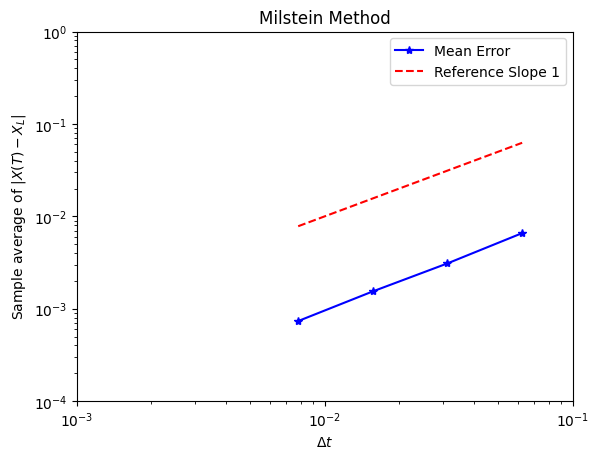

Least squares fit parameter q: 1.048839858873328
Residual: 0.022882309967231902


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Problem parameters
r = 2
K = 1
beta = 0.25
Xzero = 0.5
T = 1
N = 2**11
dt = T / N

# Number of paths sampled
M = 500

# Milstein stepsizes are R*dt
R = np.array([1, 16, 32, 64, 128])

# Generate Brownian increments
dW = np.sqrt(dt) * np.random.randn(M, N)

# Preallocate array for Milstein solutions
Xmil = np.zeros((M, 5))

# Loop over different Milstein timesteps
for p in range(5):
    Dt = R[p] * dt
    L = int(N / R[p])
    
    # Initialize Xtemp for all paths
    Xtemp = Xzero * np.ones(M)
    
    # Milstein method
    for j in range(L):
        Winc = np.sum(dW[:, R[p] * j:R[p] * (j + 1)], axis=1)
        Xtemp += Dt * r * Xtemp * (K - Xtemp) + beta * Xtemp * Winc + 0.5 * beta**2 * Xtemp * (Winc**2 - Dt)
    
    # Store Milstein solution at t=1
    Xmil[:, p] = Xtemp

# Reference solution
Xref = Xmil[:, 0]

# Error in each path
Xerr = np.abs(Xmil[:, 1:5] - Xref[:, np.newaxis])

# Mean pathwise errors
mean_Xerr = np.mean(Xerr, axis=0)

# Milstein timesteps used
Dtvals = dt * R[1:5]

# Plotting

plt.loglog(Dtvals, mean_Xerr, 'b*-', label='Mean Error')
plt.loglog(Dtvals, Dtvals, 'r--', label='Reference Slope 1')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel(r'$\Delta t$', fontsize=10)
plt.ylabel(r'Sample average of $| X(T) - X_L |$', fontsize=10)
plt.title('Milstein Method', fontsize=12)
plt.legend()
plt.show()

# Least squares fit of error = C * Dt^q
A = np.vstack([np.ones(4), np.log(Dtvals)]).T
rhs = np.log(mean_Xerr)
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(A @ sol - rhs)

print(f'Least squares fit parameter q: {q}')
print(f'Residual: {resid}')
